## <font color=orange>DSCI-633-2225 Group Project</font>

# **Analysis of Telco Customer Churn using Statistical and Machine Learning Techniques**
### <font color=blue>Group 12:</font>
### <font color=blue>Name: Parth Keyur Gawande , University ID: 774001701</font>
### <font color=blue>Name: Sarthak Rajendra Bora , University ID: 774003002</font>

## Importing Important Libraries and Dataset

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [262]:
# loading data
df_raw = pd.read_csv("telco_churn.csv")
df_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [263]:
df_raw.shape # dataset has 7043 records and 21 features

(7043, 21)

In [264]:
df_raw.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [265]:
# checking null values
df_raw.isnull().any() # Dataset has no null value

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

## Encoding the categorical Columns manually

In [266]:
# Do manual encoding of categorical varibales and and renaming columns to get a clear understanding of what the dataset is

df_cal = df_raw.copy()
df_cal.rename(columns={'gender':'Gender'
                       ,'customerID':'CustomerID'
                       ,'Contract':'ContractType'
                       ,'InternetService':'InternetServiceType'
                       ,'tenure':'Tenure'
                      }
              ,inplace=True)

df_cal['Partner'] = df_cal.Partner.map({'Yes':1,'No':0})
df_cal['Dependents'] = df_cal.Dependents.map({'Yes':1,'No':0})
df_cal['PhoneService'] = df_cal.PhoneService.map({'Yes':1,'No':0})
df_cal['MultipleLines'] = df_cal.MultipleLines.map({'Yes':1,'No':0,'No phone service':0})

df_cal['InternetService'] = df_cal.InternetServiceType.map({'DSL':1,'Fiber optic':1,'No':0})
df_cal['OnlineSecurity'] = df_cal.OnlineSecurity.map({'Yes':1,'No':0,'No internet service':0})
df_cal['OnlineBackup'] = df_cal.OnlineBackup.map({'Yes':1,'No':0,'No internet service':0})
df_cal['DeviceProtection'] = df_cal.DeviceProtection.map({'Yes':1,'No':0,'No internet service':0})
df_cal['TechSupport'] = df_cal.TechSupport.map({'Yes':1,'No':0,'No internet service':0})
df_cal['StreamingTV'] = df_cal.StreamingTV.map({'Yes':1,'No':0,'No internet service':0})
df_cal['StreamingMovies'] = df_cal.StreamingMovies.map({'Yes':1,'No':0,'No internet service':0})
df_cal['IsContracted'] = df_cal.ContractType.map({'One year':1,'Two year':1,'Month-to-month':0})
df_cal['PaperlessBilling'] = df_cal.PaperlessBilling.map({'Yes':1,'No':0})
df_cal['Churn'] = df_cal.Churn.map({'Yes':1,'No':0})

df_cal.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,...,StreamingTV,StreamingMovies,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,IsContracted
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,0,0,One year,0,Mailed check,56.95,1889.5,0,1,1
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,1
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1,0


In [267]:
df_cal.dtypes

CustomerID              object
Gender                  object
SeniorCitizen            int64
Partner                  int64
Dependents               int64
Tenure                   int64
PhoneService             int64
MultipleLines            int64
InternetServiceType     object
OnlineSecurity           int64
OnlineBackup             int64
DeviceProtection         int64
TechSupport              int64
StreamingTV              int64
StreamingMovies          int64
ContractType            object
PaperlessBilling         int64
PaymentMethod           object
MonthlyCharges         float64
TotalCharges            object
Churn                    int64
InternetService          int64
IsContracted             int64
dtype: object

In [268]:
# let's have basic analysis of all features

df_cal.describe(include='all')

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,...,StreamingTV,StreamingMovies,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,IsContracted
count,7043,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043.000000,...,7043.000000,7043.000000,7043,7043.000000,7043,7043.000000,7043,7043.000000,7043.000000,7043.000000
unique,7043,2,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,...,NaN,NaN,3,NaN,4,NaN,6531,NaN,NaN,NaN
top,7590-VHVEG,Male,NaN,NaN,NaN,NaN,NaN,NaN,Fiber optic,NaN,...,NaN,NaN,Month-to-month,NaN,Electronic check,NaN,,NaN,NaN,NaN
freq,1,3555,NaN,NaN,NaN,NaN,NaN,NaN,3096,NaN,...,NaN,NaN,3875,NaN,2365,NaN,11,NaN,NaN,NaN
mean,NaN,NaN,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,NaN,0.286668,...,0.384353,0.387903,NaN,0.592219,NaN,64.761692,NaN,0.265370,0.783331,0.449808
std,NaN,NaN,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,NaN,0.452237,...,0.486477,0.487307,NaN,0.491457,NaN,30.090047,NaN,0.441561,0.412004,0.497510
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,...,0.000000,0.000000,NaN,0.000000,NaN,18.250000,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,NaN,0.000000,...,0.000000,0.000000,NaN,0.000000,NaN,35.500000,NaN,0.000000,1.000000,0.000000
50%,NaN,NaN,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,NaN,0.000000,...,0.000000,0.000000,NaN,1.000000,NaN,70.350000,NaN,0.000000,1.000000,0.000000
75%,NaN,NaN,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,NaN,1.000000,...,1.000000,1.000000,NaN,1.000000,NaN,89.850000,NaN,1.000000,1.000000,1.000000


## EDA

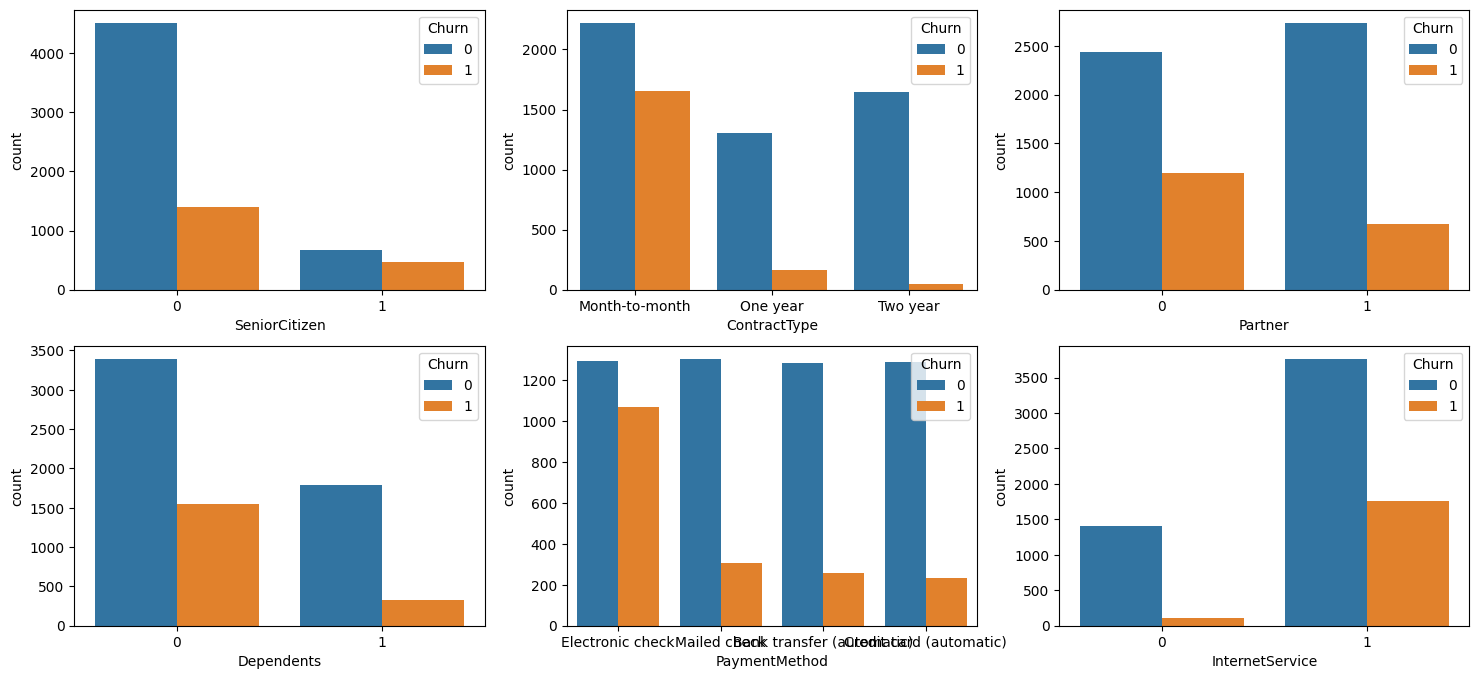

In [269]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))

sns.countplot(ax=axes[0, 0], data=df_cal, x='SeniorCitizen', hue='Churn')
sns.countplot(ax=axes[0, 1], data=df_cal, x='ContractType', hue='Churn')
sns.countplot(ax=axes[0, 2], data=df_cal, x='Partner', hue='Churn')
sns.countplot(ax=axes[1, 0], data=df_cal, x='Dependents', hue='Churn')
sns.countplot(ax=axes[1, 1], data=df_cal, x='PaymentMethod', hue='Churn')
sns.countplot(ax=axes[1, 2], data=df_cal, x='InternetService', hue='Churn')

plt.show()

In [270]:
# Calculate churn rate of telco company's dataset?

Churn_rate = df_cal['Churn'].value_counts() / df_cal.shape[0]
Churn_rate 


# from output, churn rate is around 26%

0    0.73463
1    0.26537
Name: Churn, dtype: float64

In [271]:
# calculate mean summary of customers (Churn vs non churn). 
churn_summary = df_cal.groupby('Churn')
print(churn_summary['Tenure','MonthlyCharges'].mean())

# Output shows one of the reason that trigger customer to leave brand could be high monthly charges

          Tenure  MonthlyCharges
Churn                           
0      37.569965       61.265124
1      17.979133       74.441332


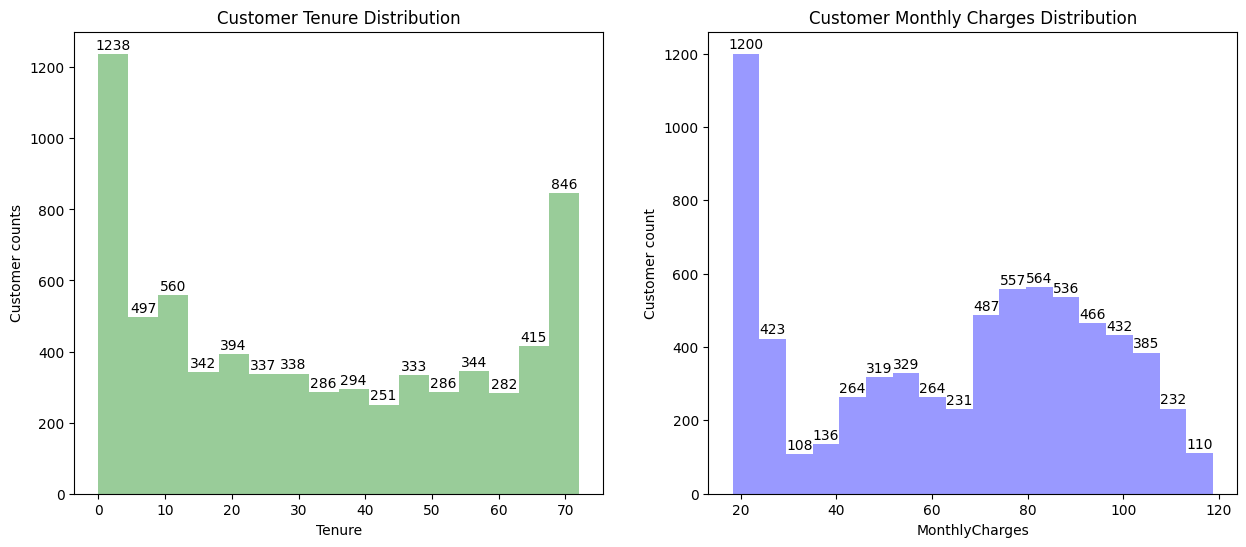

In [272]:
f, axes = plt.subplots(ncols=2, figsize=(15, 6))

sns.distplot(df_cal.Tenure, color='g', kde=False, ax=axes[0]).set_title("Customer Tenure Distribution")
axes[0].set_ylabel("Customer counts")

# Add text annotations above each bar
for rect in axes[0].patches:
    axes[0].text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 5, int(rect.get_height()), ha='center', va='bottom')

sns.distplot(df_cal.MonthlyCharges, color='b', kde=False, ax=axes[1]).set_title("Customer Monthly Charges Distribution")
axes[1].set_ylabel("Customer count")

# Add text annotations above each bar
for rect in axes[1].patches:
    axes[1].text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 5, int(rect.get_height()), ha='center', va='bottom')

plt.show()

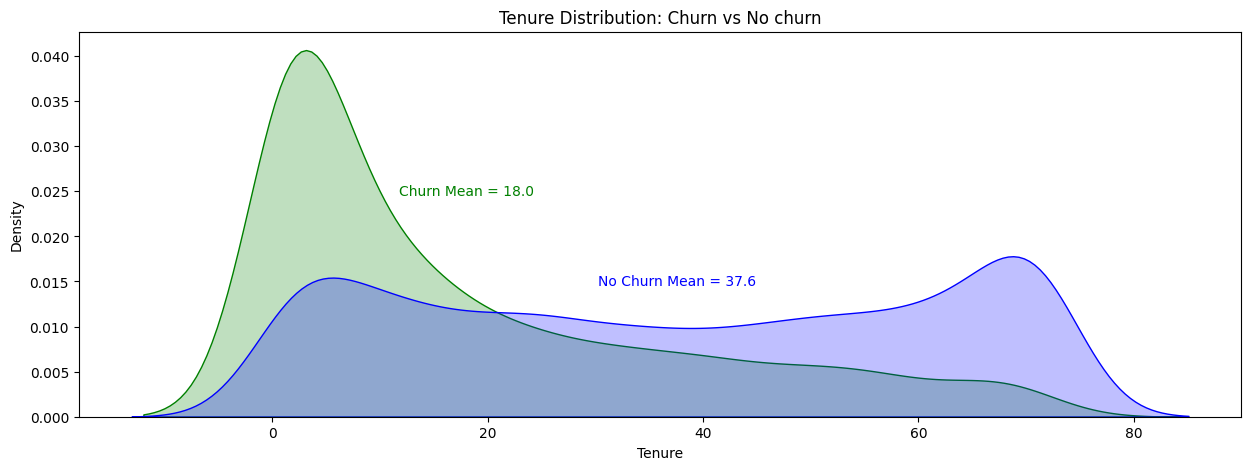

In [273]:
fig = plt.figure(figsize=(15,5))

churn_mean = df_cal.loc[df_cal['Churn']==1, 'Tenure'].mean()
nochurn_mean = df_cal.loc[df_cal['Churn']==0, 'Tenure'].mean()

ax = sns.kdeplot(df_cal.loc[(df_cal['Churn']==1),'Tenure']
                     , color = 'g'
                     , shade = True
                     , label='Churn')

ax = sns.kdeplot(df_cal.loc[(df_cal['Churn']==0) ,'Tenure']
                     , color = 'b'
                     , shade = True
                     , label='No churn')

ax.set(title='Tenure Distribution: Churn vs No churn',
       xlabel='Tenure',
       ylabel='Density')

ax.text(x=churn_mean, y=0.025, s=f'Churn Mean = {churn_mean:.1f}', ha='center', va='center', color='g')
ax.text(x=nochurn_mean, y=0.015, s=f'No Churn Mean = {nochurn_mean:.1f}', ha='center', va='center', color='b')

plt.show()

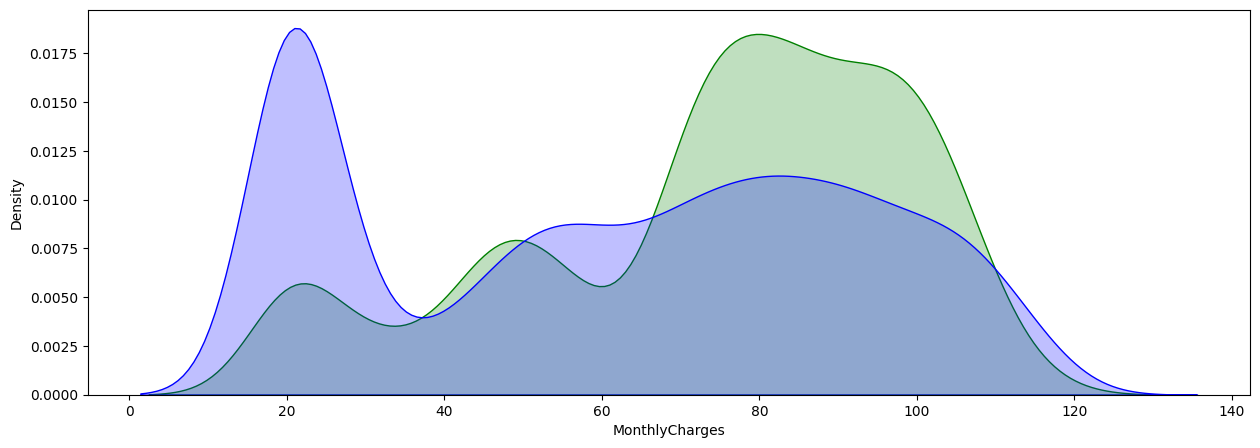

In [274]:
fig = plt.figure(figsize=(15,5))
ax = sns.kdeplot(df_cal.loc[(df_cal['Churn']==1 ),'MonthlyCharges']
                     , color = 'g'
                     , shade = True
                     , label='Churn')
ax = sns.kdeplot(df_cal.loc[(df_cal['Churn']==0 ),'MonthlyCharges']
                     , color = 'b'
                     , shade = True
                     , label='No Churn')
plt.show()
# Green shows churn distribution and blue shows non-churn

## Normalizing Data Columns

In [275]:
# Using normalization on tenure and monthlycharges column

df_cal['Tenure_norm'] = (df_cal['Tenure'] - df_cal['Tenure'].min()) / (df_cal['Tenure'].max() - df_cal['Tenure'].min())
df_cal['MonthlyCharges_norm'] = (df_cal['MonthlyCharges'] - df_cal['MonthlyCharges'].min())/ (df_cal['MonthlyCharges'].max() - df_cal['MonthlyCharges'].min())
df_cal.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,...,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,IsContracted,Tenure_norm,MonthlyCharges_norm
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,0.013889,0.115423
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,One year,0,Mailed check,56.95,1889.5,0,1,1,0.472222,0.385075
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0.027778,0.354229
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,1,0.625000,0.239303
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,Month-to-month,1,Electronic check,70.70,151.65,1,1,0,0.027778,0.521891


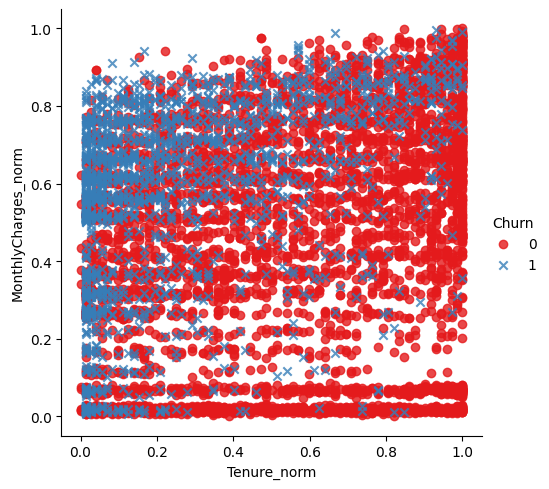

In [276]:
sns.lmplot(x='Tenure_norm',y='MonthlyCharges_norm',data=df_cal
               ,hue='Churn'
               ,fit_reg=False
               ,markers=["o", "x"]
               ,palette="Set1"
          )
plt.show()

# Churn v/s Non-Churn distribution over Monthly charges and tenure data columns

## K-Means Clustering

Text(0.5, 1.0, 'Elbow curve')

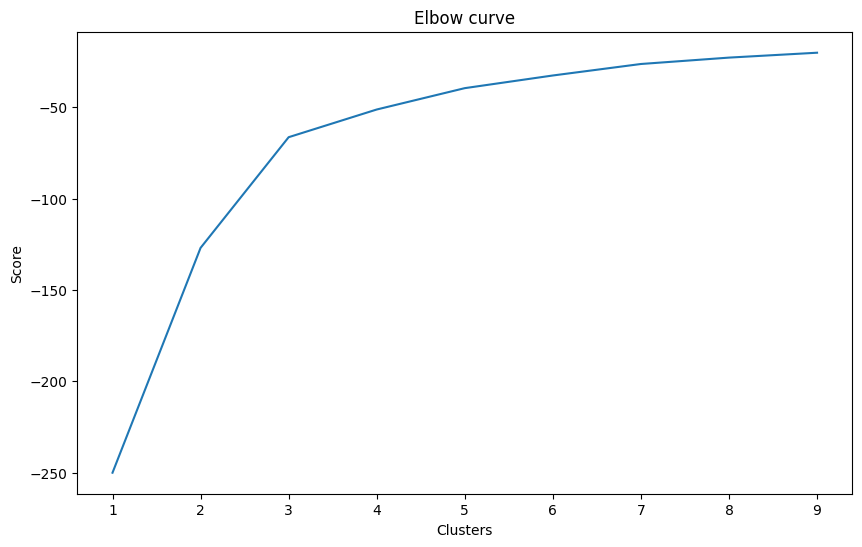

In [277]:
from sklearn.cluster import KMeans

df_kmeans_data = df_cal[df_cal.Churn==1][['Tenure_norm','MonthlyCharges_norm']]

k = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in k]

score = [kmeans[i].fit(df_kmeans_data).score(df_kmeans_data)  for i in range(len(kmeans))]

plt.figure(figsize=(10,6))
plt.plot(k,score)
plt.xlabel("Clusters")
plt.ylabel("Score")
plt.title("Elbow curve")

# from output, 3 looks more resonable

## Display CLusters

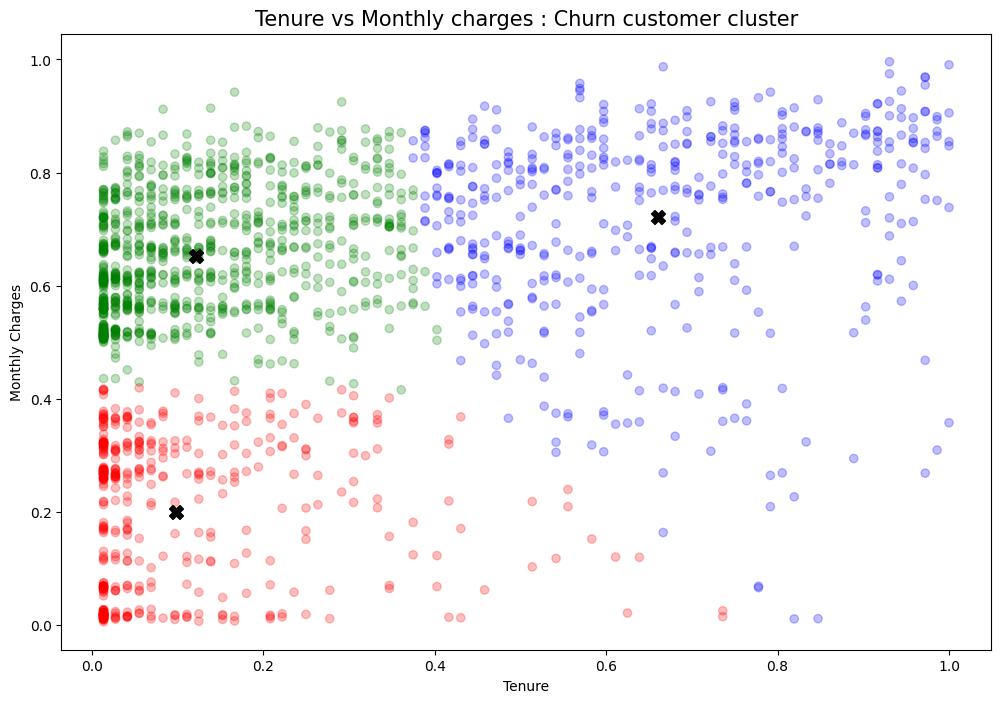

In [278]:
df_cal['Cluster'] = -1 # by default set Cluster to -1

kmeans = KMeans(n_clusters=3 # No of cluster in data
                , random_state = 2 # Selecting same training data
               ) 

kmeans.fit(df_cal[df_cal.Churn==1][['Tenure_norm','MonthlyCharges_norm']])
kmean_colors = ['green' if c == 0 else 'blue' if c == 1 else 'red' for c in kmeans.labels_]

df_cal.loc[(df_cal.Churn==1),'Cluster'] = kmeans.fit_predict(df_cal[df_cal.Churn==1][['Tenure_norm','MonthlyCharges_norm']])


fig = plt.figure(figsize=(12,8))
plt.scatter(x='Tenure_norm'
            , y='MonthlyCharges_norm'
            , data=df_cal[df_cal.Churn==1] 
            , color=kmean_colors # color of data points
            , alpha=0.25 # transparancy of data points
           )

plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")

plt.scatter(x=kmeans.cluster_centers_[:,0]
            , y=kmeans.cluster_centers_[:,1]
            , color='black'
            , marker='X' # Marker sign for data points
            , s=100 # marker size
           )
plt.title("Tenure vs Monthly charges : Churn customer cluster",fontsize=15)
plt.show()

In [279]:
# distribution of cluster
df_cal[df_cal['Churn']==1].Cluster.value_counts()

0    949
1    464
2    456
Name: Cluster, dtype: int64

There are three types of customer group , who are more likely to churn<br>
1) Less tenure and high monthly charges<br>
2) High tenure and High monthly charges<br>
3) Less tenure and low monthly charges

In [280]:
df_cluster_gp = df_cal[df_cal['Churn']==1].groupby('Cluster')
print(df_cluster_gp['Tenure','MonthlyCharges'].mean())

            Tenure  MonthlyCharges
Cluster                           
0         8.775553       83.821654
1        47.549569       90.731250
2         7.043860       38.343860


## Demographic analysis

In [281]:
group_gp = df_cluster_gp['Gender'].value_counts(normalize=True).to_frame()

#pd.concat([group_gp.index.name , group_gp.values])
group_gp.columns = ['Count']
group_gp = group_gp.reset_index()
group_gp_new = group_gp.copy()
group_gp_new

,Cluster,Gender,Count
0,0,Female,0.531085
1,0,Male,0.468915
2,1,Male,0.519397
3,1,Female,0.480603
4,2,Male,0.535088
5,2,Female,0.464912


In [282]:
df_cluster_gender_gp = df_cal[df_cal['Churn']==1].groupby(['Cluster','Gender'],as_index=False)
tenure_charges_gp =  df_cluster_gender_gp['Tenure','MonthlyCharges'].mean()
tenure_charges_gp

,Cluster,Gender,Tenure,MonthlyCharges
0,0,Female,8.418651,83.463889
1,0,Male,9.179775,84.226854
2,1,Female,45.699552,90.538117
3,1,Male,49.261411,90.909959
4,2,Female,7.231132,37.701651
5,2,Male,6.881148,38.901844


In [283]:
gender_eda = pd.merge(group_gp_new
                      , tenure_charges_gp
                      , on=['Cluster','Gender']
                      , how='inner')

print("Gender summary\n" , gender_eda)


demographic_gp = gender_eda.drop_duplicates(subset=['Cluster'],keep='first').reset_index()
demographic_gp.drop(['index'],axis=1,inplace=True)
demographic_gp.columns = ['Cluster','Label','Count','Tenure','MonthlyCharges']
demographic_gp['Marker'] = ['X','X','X']
demographic_gp['Marker_index'] = [[1,-1],[1,-1],[1,-1]]

print("Gender & Cluster \n ",demographic_gp)

Gender summary
    Cluster  Gender     Count     Tenure  MonthlyCharges
0        0  Female  0.531085   8.418651       83.463889
1        0    Male  0.468915   9.179775       84.226854
2        1    Male  0.519397  49.261411       90.909959
3        1  Female  0.480603  45.699552       90.538117
4        2    Male  0.535088   6.881148       38.901844
5        2  Female  0.464912   7.231132       37.701651
Gender & Cluster 
     Cluster   Label     Count     Tenure  MonthlyCharges Marker Marker_index
0        0  Female  0.531085   8.418651       83.463889      X      [1, -1]
1        1    Male  0.519397  49.261411       90.909959      X      [1, -1]
2        2    Male  0.535088   6.881148       38.901844      X      [1, -1]


In [284]:
df_cluster_seniorcitizen_cnt = df_cluster_gp['SeniorCitizen'].value_counts(normalize=True)

df_cluster_seniorcitizen_gp = df_cal[df_cal['Churn']==1].groupby(['Cluster','SeniorCitizen'],as_index=False)
df_cluster_seniorcitizen_gp = df_cluster_seniorcitizen_gp['Tenure','MonthlyCharges'].mean()
df_cluster_seniorcitizen_gp = df_cluster_seniorcitizen_gp[(df_cluster_seniorcitizen_gp['Cluster']==1) 
                                  & (df_cluster_seniorcitizen_gp['SeniorCitizen']==1)]


demographic_gp = demographic_gp.append(pd.DataFrame({"Cluster":[1]
                                    ,'Label':['SeniorCitizen']
                                    ,'Count': [df_cluster_seniorcitizen_cnt[1][1]]
                                    ,'Tenure':df_cluster_seniorcitizen_gp['Tenure'].values
                                    ,'MonthlyCharges':df_cluster_seniorcitizen_gp['MonthlyCharges'].values
                                    ,'Marker':['o']
                                    ,'Marker_index' : [[-1,3]]
                                                     
                                   })
                      ,ignore_index=True)
print(demographic_gp)

   Cluster          Label     Count     Tenure  MonthlyCharges Marker  \
0        0         Female  0.531085   8.418651       83.463889      X   
1        1           Male  0.519397  49.261411       90.909959      X   
2        2           Male  0.535088   6.881148       38.901844      X   
3        1  SeniorCitizen  0.323276  46.166667       91.943333      o   

  Marker_index  
0      [1, -1]  
1      [1, -1]  
2      [1, -1]  
3      [-1, 3]  


In [285]:
df_cluster_partner_cnt = df_cluster_gp['Partner'].value_counts(normalize=True)
print(df_cluster_partner_cnt)

Cluster  Partner
0        0          0.699684
         1          0.300316
1        1          0.588362
         0          0.411638
2        0          0.756579
         1          0.243421
Name: Partner, dtype: float64


In [286]:
df_cluster_dependent_cnt = df_cluster_gp['Dependents'].value_counts(normalize=True)
print(df_cluster_dependent_cnt)

Cluster  Dependents
0        0             0.857745
         1             0.142255
1        0             0.782328
         1             0.217672
2        0             0.802632
         1             0.197368
Name: Dependents, dtype: float64


Text(0.5, 1.0, 'Tenure vs Monthly charges demographic distribution')

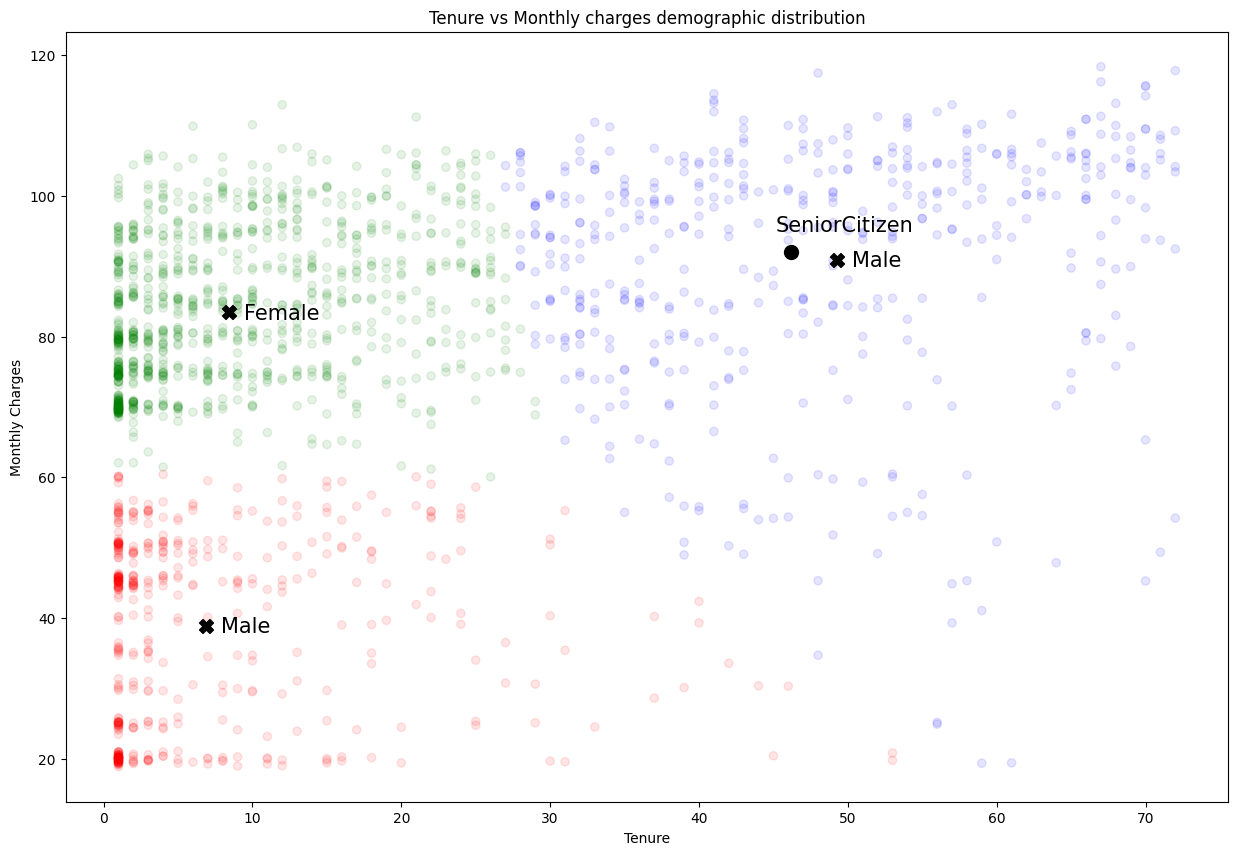

In [287]:
fig, ax = plt.subplots(figsize=(15,10))

ax.scatter(x='Tenure'
            , y='MonthlyCharges'
            , data=df_cal[df_cal.Churn==1] 
            , color=kmean_colors # color of data points
            , alpha=0.10 # transparancy of data points
           )

for i,kind in enumerate(demographic_gp['Marker']):
    ax.scatter(x=demographic_gp['Tenure'][i]
            , y=demographic_gp['MonthlyCharges'][i]
            , color='black'
            , marker=kind # Marker sign for data points
            , s=100 # marker size
           )

    

for i,txt in enumerate(demographic_gp['Label']):
    ax.text(demographic_gp['Tenure'][i] + demographic_gp['Marker_index'][i][0]
            ,demographic_gp['MonthlyCharges'][i] + demographic_gp['Marker_index'][i][1]
            ,txt
            ,fontsize = 15
            )

plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")
plt.title("Tenure vs Monthly charges demographic distribution")

Here, we have gender, age bands (in terms of married, have children and senior citizen) related information. 

1) Less tenure and high monthly charges
    - More likely to be Female

2) High tenure and High monthly charges
    - More likely to be male and senior citizen
    
3) Less tenure and low monthly charges
    - More likely to be male 

In [288]:
'''
Usage related information


Phone service - 

PhoneService             int64
MultipleLines            int64

Internet service - 
InternetServiceType     object
OnlineSecurity           int64
OnlineBackup             int64
DeviceProtection         int64
TechSupport              int64
StreamingTV              int64
StreamingMovies          int64

Contract type - ContractType
'''


df_usage = df_cal[df_cal['Churn']==1].groupby('Churn') 


In [289]:
# Does phone service helps to retain customers?

print("Phone service distribution \n",df_cal['PhoneService'].value_counts(normalize=True))

print("Phone & churn distribution \n",df_cal.groupby('Churn')['PhoneService'].value_counts(normalize=True))

# From second output, Churn customers have same distribution as active customers.

Phone service distribution 
 1    0.903166
0    0.096834
Name: PhoneService, dtype: float64
Phone & churn distribution 
 Churn  PhoneService
0      1               0.901044
       0               0.098956
1      1               0.909042
       0               0.090958
Name: PhoneService, dtype: float64


In [290]:
# Does internet service helps to keep customers?

print(df_cal['InternetService'].value_counts(normalize=True))

churn_internet = df_cal.groupby('Churn')['InternetService'].value_counts(normalize=True)
churn_internet = churn_internet.reset_index(name="Percentage")
print(churn_internet)

# Insights - Most of the churn customers have internet services compared to active customers.

1    0.783331
0    0.216669
Name: InternetService, dtype: float64
   Churn  InternetService  Percentage
0      0                1    0.726904
1      0                0    0.273096
2      1                1    0.939540
3      1                0    0.060460


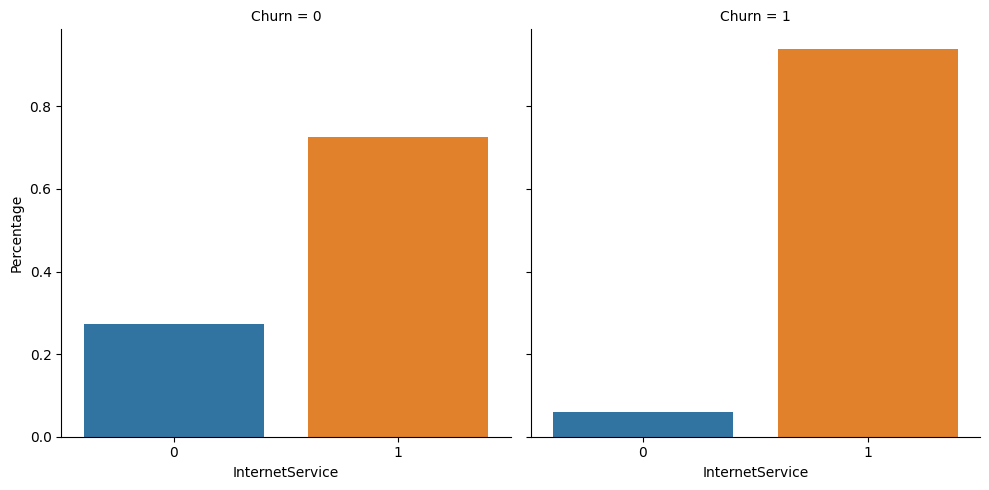

In [291]:
sns.catplot(x='InternetService'
           , y='Percentage'
           , data = churn_internet
           , col='Churn'
           , kind='bar')

In [292]:
# Load the Telco Customer Churn dataset
df=pd.read_csv("telco_churn.csv")

## Convert object data type TotalCharges to numeric type for ease of calculation

In [293]:
# Convert TotalCharges column to numeric type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Replace null values with mean value
mean_total_charges = df['TotalCharges'].mean()
df['TotalCharges'].fillna(mean_total_charges, inplace=True)

# Drop irrelavant column

In [294]:
df=df.drop(columns="customerID")

## Churn Distribution

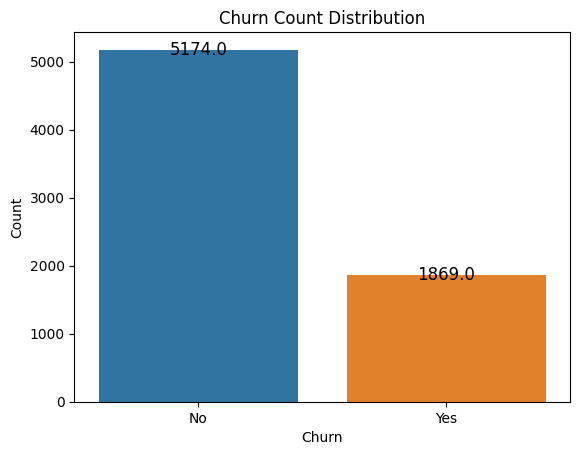

In [295]:
# Create countplot and retrieve axes object
ax = sns.countplot(x='Churn', data=df)

# Add count labels on top of bars
for p in ax.patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(count, (x, y), ha='center', va='center', fontsize=12, color='black')

# Set labels and title
ax.set_xlabel('Churn')
ax.set_ylabel('Count')
ax.set_title('Churn Count Distribution')

# Show the plot
plt.show()

We can see that out of the total 7043 customers , 5174 are non-churn customers and 1869 and customers who are churn

In [296]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [297]:
target_col = 'Churn'

## Use label encoding on categorical variables

In [298]:
# Encode categorical variables
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
            'PaymentMethod']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


## Use standardization on numerical data features

In [299]:
# Standardize the numerical variables
num_cols = ['tenure', 'MonthlyCharges', 'SeniorCitizen']
scaler = StandardScaler()


In [300]:
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

## Perform chi-squared test on categorial variables for feature selection

In [301]:
# Chi-squared test for categorical features
chi2_scores = []
for col in cat_cols:
    crosstab = pd.crosstab(df[col], df[target_col])
    chi2, pval, dof, expected = chi2_contingency(crosstab)
    chi2_scores.append((col, chi2, pval))

# Select features with highest chi-squared statistic
chi2_scores.sort(key=lambda x: x[1], reverse=True)
selected_cat_cols = [score[0] for score in chi2_scores[:5]]
print('Selected categorical columns:', selected_cat_cols)

Selected categorical columns: ['Contract', 'OnlineSecurity', 'TechSupport', 'InternetService', 'PaymentMethod']


## Perform t-test on numerical variables for feature selection

In [302]:
# T-test for continuous features
t_scores = []
for col in num_cols:
    churn = df[df[target_col] == 'Yes'][col]
    non_churn = df[df[target_col] == 'No'][col]
    tval, pval = ttest_ind(churn, non_churn, equal_var=False)
    t_scores.append((col, abs(tval), pval))
    
# Select features with highest absolute t-value
t_scores.sort(key=lambda x: x[1], reverse=True)
selected_num_cols = [score[0] for score in t_scores[:5]]
print('Selected numerical columns:', selected_num_cols)

Selected numerical columns: ['tenure', 'MonthlyCharges', 'SeniorCitizen']


In [303]:
# Scale the numerical columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df[selected_num_cols] = scaler.fit_transform(df[num_cols])

In [304]:
df_selected=selected_num_cols+selected_cat_cols 

In [305]:
df_selected

['tenure',
 'MonthlyCharges',
 'SeniorCitizen',
 'Contract',
 'OnlineSecurity',
 'TechSupport',
 'InternetService',
 'PaymentMethod']

In [306]:
df_selected = df.loc[:, df_selected].copy()

In [307]:
df_selected

,tenure,MonthlyCharges,SeniorCitizen,Contract,OnlineSecurity,TechSupport,InternetService,PaymentMethod
0,-1.277445,-1.160323,-0.994971,0,0,0,0,2
1,0.066327,-0.259629,-0.173876,1,2,0,0,3
2,-1.236724,-0.362660,-0.960399,0,2,0,0,3
3,0.514251,-0.746535,-0.195400,1,2,2,0,0
4,-1.236724,0.197365,-0.941193,0,0,0,1,2
...,...,...,...,...,...,...,...,...
7038,-0.340876,0.665992,-0.129281,1,2,2,0,3
7039,1.613701,1.277533,2.242808,1,0,0,1,1
7040,-0.870241,-1.168632,-0.855182,0,2,0,0,2
7041,-1.155283,0.320338,-0.872777,0,0,0,1,3


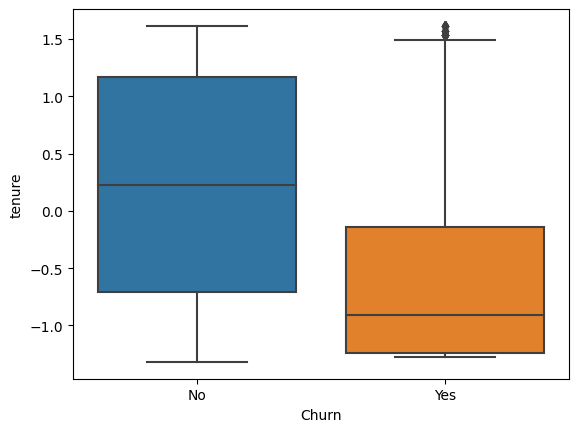

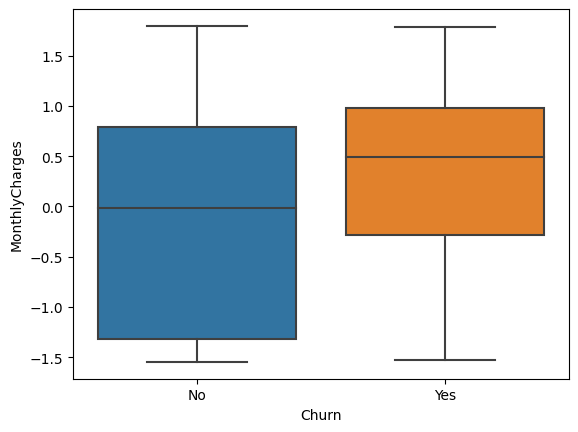

In [308]:
# Check the distribution of numerical variables
num_cols = ['tenure', 'MonthlyCharges']
for col in num_cols:
    sns.boxplot(x='Churn', y=col, data=df)
    plt.show()

## Correlation Heatmap for the df_selected dataset

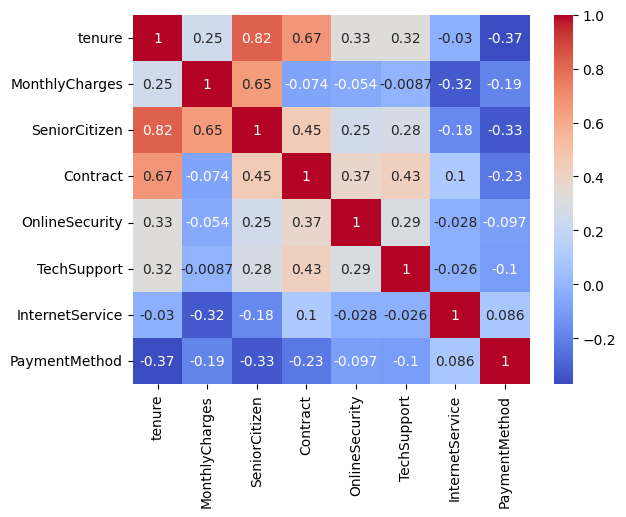

In [309]:
# Create heatmap
sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm')

# Show the plot
plt.show()

## Perform Train-test Split 80-20 %

In [310]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

## MonthlyCharges Column is our target variable to predict monthly charges of customers

In [311]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_selected.drop(columns=['MonthlyCharges']), df_selected['MonthlyCharges'], test_size=0.2, random_state=42)

## Linear Regression

In [312]:
from sklearn.model_selection import GridSearchCV
# Linear Regression
linreg = LinearRegression()

# Define the hyperparameter grid
linreg_param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [1, 2, 4, 8]
}

# Perform GridSearchCV to find the best hyperparameters
linreg_grid = GridSearchCV(linreg, linreg_param_grid, cv=5, scoring='neg_mean_squared_error')
linreg_grid.fit(X_train, y_train)

# Print the best hyperparameters for each model
print("Linear Regression: ", linreg_grid.best_params_)

Linear Regression:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1}


## K-NN Regression

In [313]:
# K-NN Regression
knnreg = KNeighborsRegressor()

# Define the hyperparameter grid
knnreg_param_grid = {
    'n_neighbors': range(1, 30),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform GridSearchCV to find the best hyperparameters
knnreg_grid = GridSearchCV(knnreg, knnreg_param_grid, cv=5, scoring='neg_mean_squared_error')
knnreg_grid.fit(X_train, y_train)

print("K-NN Regression: ", knnreg_grid.best_params_)

K-NN Regression:  {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


## Decision Tree Regression

In [314]:
# Decision Tree Regression
dtreg = DecisionTreeRegressor()

# Define the hyperparameter grid
dtreg_param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best hyperparameters
dtreg_grid = GridSearchCV(dtreg, dtreg_param_grid, cv=5, scoring='neg_mean_squared_error')
dtreg_grid.fit(X_train, y_train)

print("Decision Tree Regression: ", dtreg_grid.best_params_)

Decision Tree Regression:  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


## Creating Regression Modles with best hyperparameters

In [315]:
from sklearn.model_selection import cross_val_score

# Define the regression models with the best hyperparameters
linreg_params = {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1}
knnreg_params = {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
dtreg_params =  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}

# Instantiate each model with its corresponding hyperparameters
linreg = LinearRegression(**linreg_params)
knnreg = KNeighborsRegressor(**knnreg_params)
dtreg = DecisionTreeRegressor(**dtreg_params)

In [316]:
# Perform k-fold cross-validation on the training set
linreg_scores = cross_val_score(linreg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
knnreg_scores = cross_val_score(knnreg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
dtreg_scores = cross_val_score(dtreg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

## Get RMSE score 

In [317]:
# Print the mean RMSE scores for each model
print("Linear Regression Mean RMSE: ", np.sqrt(-linreg_scores.mean()))
print("K-NN Regression Mean RMSE: ", np.sqrt(-knnreg_scores.mean()))
print("Decision Tree Regression Mean RMSE: ", np.sqrt(-dtreg_scores.mean()))

Linear Regression Mean RMSE:  0.5231387433300089
K-NN Regression Mean RMSE:  0.20820579551826868
Decision Tree Regression Mean RMSE:  0.13029621849372497


In [318]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [319]:
# Fit the regression models on the training set
linreg.fit(X_train, y_train)
knnreg.fit(X_train, y_train)
dtreg.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=4)

In [320]:
# Predict on the test set
y_pred_linreg = linreg.predict(X_test)
y_pred_knnreg = knnreg.predict(X_test)
y_pred_dtreg = dtreg.predict(X_test)

## Get all performance metrics value from each model

In [321]:
# Compute and print evaluation metrics for each model
print("Linear Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_linreg))
print("MSE:", mean_squared_error(y_test, y_pred_linreg))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_linreg)))
print("R^2:", r2_score(y_test, y_pred_linreg))
print()

Linear Regression Metrics:
MAE: 0.4152120820121828
MSE: 0.27147057828152665
RMSE: 0.5210283852934758
R^2: 0.7285570803073069



In [322]:
print("K-NN Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_knnreg))
print("MSE:", mean_squared_error(y_test, y_pred_knnreg))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_knnreg)))
print("R^2:", r2_score(y_test, y_pred_knnreg))
print()

K-NN Regression Metrics:
MAE: 0.1177626265958869
MSE: 0.03532648796364824
RMSE: 0.18795341966468246
R^2: 0.9646771112507185



In [323]:
print("Decision Tree Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_dtreg))
print("MSE:", mean_squared_error(y_test, y_pred_dtreg))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dtreg)))
print("R^2:", r2_score(y_test, y_pred_dtreg))

Decision Tree Regression Metrics:
MAE: 0.08128097142127041
MSE: 0.015722263248439772
RMSE: 0.12538844942194546
R^2: 0.9842793386032875


## Store all the metrics in a pandas dataframe

In [324]:
import pandas as pd

# Define the evaluation metrics for each model
linear_reg_metrics = [mean_absolute_error(y_test, y_pred_linreg),
                      mean_squared_error(y_test, y_pred_linreg),
                      np.sqrt(mean_squared_error(y_test, y_pred_linreg)),
                      r2_score(y_test, y_pred_linreg)]

knn_reg_metrics = [mean_absolute_error(y_test, y_pred_knnreg),
                   mean_squared_error(y_test, y_pred_knnreg),
                   np.sqrt(mean_squared_error(y_test, y_pred_knnreg)),
                   r2_score(y_test, y_pred_knnreg)]

dt_reg_metrics = [mean_absolute_error(y_test, y_pred_dtreg),
                  mean_squared_error(y_test, y_pred_dtreg),
                  np.sqrt(mean_squared_error(y_test, y_pred_dtreg)),
                  r2_score(y_test, y_pred_dtreg)]

# Create a table of the evaluation metrics for each model
table_data = {'Metrics': ['MAE', 'MSE', 'RMSE', 'R^2'],
              'Linear Regression': linear_reg_metrics,
              'K-NN Regression': knn_reg_metrics,
              'Decision Tree Regression': dt_reg_metrics}

df_metrics = pd.DataFrame(table_data)
df_metrics

,Metrics,Linear Regression,K-NN Regression,Decision Tree Regression
0,MAE,0.415212,0.117763,0.081281
1,MSE,0.271471,0.035326,0.015722
2,RMSE,0.521028,0.187953,0.125388
3,R^2,0.728557,0.964677,0.984279


The table shows the performance metrics for three different regression models: Linear Regression, K-NN Regression, and Decision Tree Regression. The metrics used to evaluate the models are Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R^2). Based solely on the metrics provided in the table, the Decision Tree Regression model appears to perform the best. It has the lowest values for MAE, MSE, and RMSE, indicating that it produces the least amount of error in its predictions. Additionally, it has the highest value for R^2, which indicates that it explains the greatest amount of variance in the data

## The best Regression Model is Decision Tree Regression

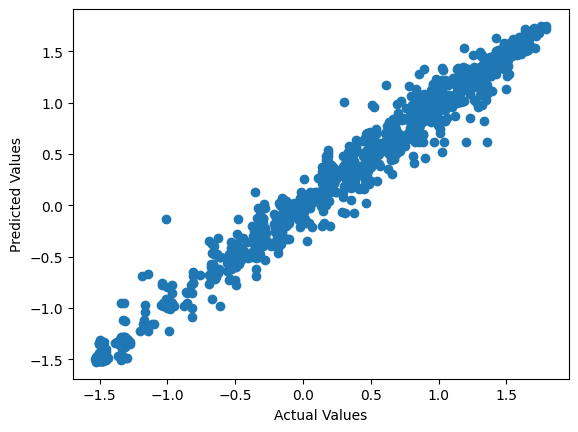

In [325]:
# Generate predictions for the test set using the trained linear regression model
y_pred_dtreg = dtreg.predict(X_test)

# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred_dtreg)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

## Decison Tree Regression has the Lowest RMSE score

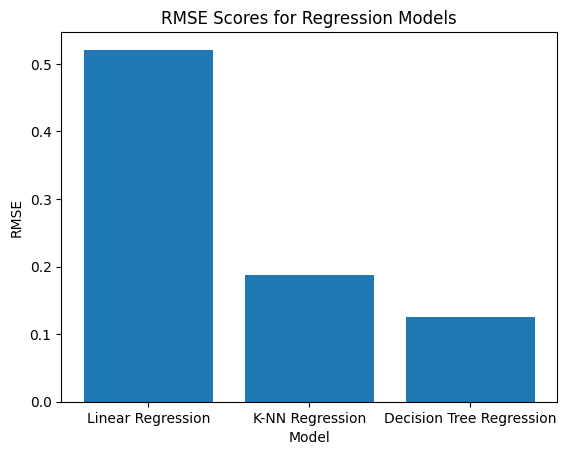

In [326]:
# Create a bar plot of the RMSE scores
rmse_scores = [np.sqrt(mean_squared_error(y_test, y_pred_linreg)), 
               np.sqrt(mean_squared_error(y_test, y_pred_knnreg)), 
               np.sqrt(mean_squared_error(y_test, y_pred_dtreg))]
models = ['Linear Regression', 'K-NN Regression', 'Decision Tree Regression']
plt.bar(models, rmse_scores)
plt.title('RMSE Scores for Regression Models')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.show()

## Predicting Values and Comparing it with true values

In [327]:
# Predict the churn probabilities for the selected rows
y_pred_dt = dtreg.predict(X_test)

In [328]:
# Compare the predicted target values with the actual target values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dt})

# Print the first 10 rows of the comparison dataframe
print(comparison_df.head(10))

        Actual  Predicted
185  -1.328164  -1.332319
2715 -1.313208  -1.343951
3825 -1.509300  -1.495175
1807  0.385148   0.382240
132  -0.472339  -0.491948
1263  0.825524   0.959893
3732  0.411737   0.160806
1672  0.243896   0.124800
811   1.304122   1.348160
2526 -1.507638  -1.509538


In [329]:
df_selected

,tenure,MonthlyCharges,SeniorCitizen,Contract,OnlineSecurity,TechSupport,InternetService,PaymentMethod
0,-1.277445,-1.160323,-0.994971,0,0,0,0,2
1,0.066327,-0.259629,-0.173876,1,2,0,0,3
2,-1.236724,-0.362660,-0.960399,0,2,0,0,3
3,0.514251,-0.746535,-0.195400,1,2,2,0,0
4,-1.236724,0.197365,-0.941193,0,0,0,1,2
...,...,...,...,...,...,...,...,...
7038,-0.340876,0.665992,-0.129281,1,2,2,0,3
7039,1.613701,1.277533,2.242808,1,0,0,1,1
7040,-0.870241,-1.168632,-0.855182,0,2,0,0,2
7041,-1.155283,0.320338,-0.872777,0,0,0,1,3


WE can see that all values of Monthly charges are predicted correctly by our linear regression model

## Importing Libraries required for Classification

In [330]:
from sklearn.model_selection import KFold, cross_validate, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

## Target column is Churn

In [331]:
target_col = 'Churn'

In [332]:
df_selected[target_col] = df[target_col]

## Perform the Train-test Split for Classification

In [333]:
# Split the dataset into training and testing sets using train-test split and perform k-fold cross-validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_selected.drop(columns="Churn", axis=1), df_selected['Churn'], test_size=0.2, random_state=42)
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

## Performing classification using pipelines for each individual model

## Logistic Regression

In [334]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define the pipeline with the OneHotEncoder, StandardScaler, and Logistic Regression
# Use ColumnTransformer to apply OneHotEncoder to categorical columns and StandardScaler to numerical columns
lr_pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), selected_num_cols),
        ('cat', OneHotEncoder(), selected_cat_cols)
    ], remainder='passthrough')),
    ('clf', LogisticRegression())
])

# Define the hyperparameters for tuning
lr_params = {
    'clf__penalty': ['l2'],
    'clf__C': [0.1, 1, 10],
    'clf__solver': ['liblinear','lbfgs','newton-cg']
}

# Create a GridSearchCV object
lr_grid = GridSearchCV(lr_pipeline, lr_params, cv=5, n_jobs=-1, scoring='accuracy', error_score='raise')

# Fit the GridSearchCV object to the training data
lr_grid.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters for Logistic Regression: ", lr_grid.best_params_)
print("Accuracy Score for Logistic Regression: ", lr_grid.best_score_)

Best Hyperparameters for Logistic Regression:  {'clf__C': 1, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
Accuracy Score for Logistic Regression:  0.7944625776791525


In [335]:
# Evaluate the performance of the best model on the test data
y_pred_lr = lr_grid.predict(X_test)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
print("Precision Score for Logistic Regression Classification: ", precision_lr)
print("Recall Score for Logistic Regressiont Classification: ", recall_lr)
print("F1 Score for Logistic Regression Classification: ", f1_lr)

Precision Score for Logistic Regression Classification:  0.8005003911910376
Recall Score for Logistic Regressiont Classification:  0.808374733853797
F1 Score for Logistic Regression Classification:  0.8026910357388429


## K-NN Classification

In [336]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Define the pipeline with the OneHotEncoder, StandardScaler, and KNN classification
# Use ColumnTransformer to apply OneHotEncoder to categorical columns and StandardScaler to numerical columns
knn_pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), selected_num_cols),
        ('cat', OneHotEncoder(), selected_cat_cols)
    ], remainder='passthrough')),
    ('clf', KNeighborsClassifier())
])

# Define the hyperparameters for tuning
knn_params = {
    'clf__n_neighbors': [10,100,10],
    'clf__weights': ['uniform', 'distance'],
    'clf__p': [1, 2, 3]
}

# Create a GridSearchCV object
knn_grid = GridSearchCV(knn_pipeline, knn_params, cv=5, n_jobs=-1, scoring='accuracy', error_score='raise')

# Fit the GridSearchCV object to the training data
knn_grid.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters for KNN Classification: ", knn_grid.best_params_)
print("Accuracy Score for KNN Classification: ", knn_grid.best_score_)

Best Hyperparameters for KNN Classification:  {'clf__n_neighbors': 100, 'clf__p': 3, 'clf__weights': 'uniform'}
Accuracy Score for KNN Classification:  0.791622865842607


In [337]:
# Evaluate the performance of the best model on the test data
y_pred_knn = knn_grid.predict(X_test)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
print("Precision Score for KNN Classification: ", precision_knn)
print("Recall Score for KNN Classification: ", recall_knn)
print("F1 Score for KNN Classification: ", f1_knn)

Precision Score for KNN Classification:  0.8031802030864921
Recall Score for KNN Classification:  0.8112136266855926
F1 Score for KNN Classification:  0.80518387530885


## Decision Tree Classification

In [338]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# Define the pipeline with the OneHotEncoder and Decision Tree classification
# Use ColumnTransformer to apply OneHotEncoder to categorical columns and StandardScaler to numerical columns
dt_pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), selected_num_cols),
        ('cat', OneHotEncoder(), selected_cat_cols)
    ], remainder='passthrough')),
    ('clf', DecisionTreeClassifier())
])

# Define the hyperparameters for tuning
dt_params = {
    'clf__max_depth': np.arange(1,10,1),
    'clf__min_samples_split':np.arange(2,10,2),
    'clf__min_samples_leaf': np.arange(1,10,2),
    'clf__criterion': ['gini', 'entropy']
}

# Create a GridSearchCV object
dt_grid = GridSearchCV(dt_pipeline, dt_params, cv=5, n_jobs=-1, scoring='accuracy', error_score='raise')

# Fit the GridSearchCV object to the training data
dt_grid.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters for Decision Tree Classification: ", dt_grid.best_params_)
print("Accuracy Score for Decision Tree Classification: ", dt_grid.best_score_)

Best Hyperparameters for Decision Tree Classification:  {'clf__criterion': 'gini', 'clf__max_depth': 7, 'clf__min_samples_leaf': 7, 'clf__min_samples_split': 2}
Accuracy Score for Decision Tree Classification:  0.7900242868017544


In [339]:
# Evaluate the performance of the best model on the test data
y_pred_dt = dt_grid.predict(X_test)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
print("Precision Score for Decision Tree Classification: ", precision_dt)
print("Recall Score for Decision TreeClassification: ", recall_dt)
print("F1 Score for Decision Tree Classification: ", f1_dt)

Precision Score for Decision Tree Classification:  0.7898893863255773
Recall Score for Decision TreeClassification:  0.8019872249822569
F1 Score for Decision Tree Classification:  0.7867854116525436


## Random Forest Classification

In [340]:
from sklearn.ensemble import RandomForestClassifier

# Define the pipeline with the OneHotEncoder and Random Forest classification
# Use ColumnTransformer to apply OneHotEncoder to categorical columns and StandardScaler to numerical columns
rf_pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), selected_num_cols),
        ('cat', OneHotEncoder(), selected_cat_cols)
    ], remainder='passthrough')),
    ('clf', RandomForestClassifier())
])

# Define the hyperparameters for tuning
rf_params = {
    'clf__n_estimators': [50, 100, 150],
    'clf__max_depth': [None, 5, 10, 15],
    'clf__bootstrap': [True, False]
}

# Create a GridSearchCV object
rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=5, n_jobs=-1, scoring='accuracy', error_score='raise')

# Fit the GridSearchCV object to the training data
rf_grid.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['tenure',
                                                                          'MonthlyCharges',
                                                                          'SeniorCitizen']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Contract',
                                                                          'OnlineSecurity',
                                                                          'TechSupport',
                                                                          'InternetService',
                                                                          'PaymentMethod'])])),
                                       ('clf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'clf__bootstrap': [True, False],
                         'clf__max_depth': [None, 5, 10, 15],
                         'clf__n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [341]:
from sklearn.metrics import precision_score, recall_score, f1_score
# Print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters for Random Forest Classification: ", rf_grid.best_params_)
print("Accuracy Score for Random Forest Classification: ", rf_grid.best_score_)

# Evaluate the performance of the best model on the test data
y_pred_rf = rf_grid.predict(X_test)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print("Precision Score for Random Forest Classification: ", precision_rf)
print("Recall Score for Random Forest Classification: ", recall_rf)
print("F1 Score for Random Forest Classification: ", f1_rf)

Best Hyperparameters for Random Forest Classification:  {'clf__bootstrap': True, 'clf__max_depth': 5, 'clf__n_estimators': 150}
Accuracy Score for Random Forest Classification:  0.796415135673545
Precision Score for Random Forest Classification:  0.7941937183360332
Recall Score for Random Forest Classification:  0.8055358410220014
F1 Score for Random Forest Classification:  0.7930678005327885


## SVM classification

In [342]:
from sklearn.svm import SVC

# Define the pipeline with the OneHotEncoder and SVM classification
svm_pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), selected_num_cols),
        ('cat', OneHotEncoder(), selected_cat_cols)
    ], remainder='passthrough')),
    ('clf', SVC())
])

# Define the hyperparameters for tuning
svm_params = {
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'rbf'],
    'clf__gamma': ['scale', 'auto']
}

# Create a GridSearchCV object
svm_grid = GridSearchCV(svm_pipeline, svm_params, cv=5, n_jobs=-1, scoring='accuracy', error_score='raise')

# Fit the GridSearchCV object to the training data
svm_grid.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters for SVM Classification: ", svm_grid.best_params_)
print("Accuracy Score for SVM Classification: ", svm_grid.best_score_)

Best Hyperparameters for SVM Classification:  {'clf__C': 10, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}
Accuracy Score for SVM Classification:  0.7951717964195485


In [343]:
# Evaluate the performance of the best model on the test data
y_pred_svm = svm_grid.predict(X_test)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
print("Precision Score for SVM Classification: ", precision_svm)
print("Recall Score for SVM Classification: ", recall_svm)
print("F1 Score for SVM Classification: ", f1_svm)

Precision Score for SVM Classification:  0.8018449041585377
Recall Score for SVM Classification:  0.8105039034776437
F1 Score for SVM Classification:  0.8036769218671177


## Gradient Boosting Classification

In [344]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define the pipeline with the OneHotEncoder and Gradient Boosting Classifier
gb_pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), selected_num_cols),
        ('cat', OneHotEncoder(), selected_cat_cols)
    ], remainder='passthrough')),
    ('clf', GradientBoostingClassifier())
])

# Define the hyperparameters for tuning
gb_params = {
    'clf__n_estimators': [50, 100, 150],
    'clf__learning_rate': [0.01, 0.1, 1],
    'clf__max_depth': [2, 3, 4],
    'clf__min_samples_split': [2, 5, 10],
}

# Create a GridSearchCV object
gb_grid = GridSearchCV(gb_pipeline, gb_params, cv=5, n_jobs=-1, scoring='accuracy', error_score='raise')

# Fit the GridSearchCV object to the training data
gb_grid.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters for Gradient Boosting Classifier: ", gb_grid.best_params_)
print("Accuracy Score for Gradient Boosting Classifier: ", gb_grid.best_score_)

Best Hyperparameters for Gradient Boosting Classifier:  {'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__min_samples_split': 10, 'clf__n_estimators': 50}
Accuracy Score for Gradient Boosting Classifier:  0.7988992925149054


In [345]:
# Evaluate the performance of the best model on the test data
y_pred_gb = gb_grid.predict(X_test)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
print("Precision Score for Gradient Boosting Classification: ", precision_gb)
print("Recall Score for Gradient Boosting Classification: ", recall_gb)
print("F1 Score for Gradient Boosting Classification: ", f1_gb)

Precision Score for Gradient Boosting Classification:  0.7964550291458614
Recall Score for Gradient Boosting Classification:  0.8062455642299503
F1 Score for Gradient Boosting Classification:  0.7980901892733441


## Create a dataframe to store all the performance metrics of classifiers

In [346]:
# Define the evaluation metrics for each model
lr_metrics = [format(lr_grid.best_score_, '.4f'), format(precision_lr, '.4f'), format(recall_lr, '.4f'), format(f1_lr, '.4f')]
knn_metrics = [format(knn_grid.best_score_, '.4f'), format(precision_knn, '.4f'), format(recall_knn, '.4f'), format(f1_knn, '.4f')]
dt_metrics = [format(dt_grid.best_score_, '.4f'), format(precision_dt, '.4f'), format(recall_dt, '.4f'), format(f1_dt, '.4f')]
rf_metrics = [format(rf_grid.best_score_, '.4f'), format(precision_rf, '.4f'), format(recall_rf, '.4f'), format(f1_rf, '.4f')]
svm_metrics =[format(svm_grid.best_score_, '.4f'), format(precision_svm, '.4f'), format(recall_svm, '.4f'), format(f1_svm, '.4f')]
gb_metrics  = [format(gb_grid.best_score_, '.4f'), format(precision_gb, '.4f'), format(recall_gb, '.4f'), format(f1_gb, '.4f')]


# Create a table of the evaluation metrics for each model
table_data1 = {'Models': ['Accuracy', 'Precision', 'Recall', 'F1'],
              'Logistic Regression': lr_metrics,
              'KNN Classification': knn_metrics,
              'Decision Tree Classification': dt_metrics,
              'Random Forest Classification':rf_metrics,
              'SVM Classification': svm_metrics,
              'Gradient Boosting': gb_metrics,
              }

df1_metrics = pd.DataFrame(table_data1)

In [347]:
df1_metrics=df1_metrics.transpose()

In [348]:
df1_metrics

,0,1,2,3
Models,Accuracy,Precision,Recall,F1
Logistic Regression,0.7945,0.8005,0.8084,0.8027
KNN Classification,0.7916,0.8032,0.8112,0.8052
Decision Tree Classification,0.7900,0.7899,0.8020,0.7868
Random Forest Classification,0.7964,0.7942,0.8055,0.7931
SVM Classification,0.7952,0.8018,0.8105,0.8037
Gradient Boosting,0.7989,0.7965,0.8062,0.7981


## Plot graph of accuracy for each classifier

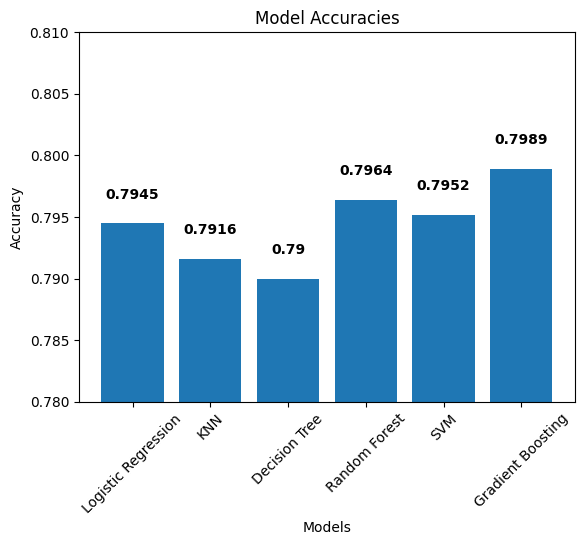

In [349]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the accuracy values for each model
accuracies = [float(lr_metrics[0]), float(knn_metrics[0]), float(dt_metrics[0]), float(rf_metrics[0]), float(svm_metrics[0]), float(gb_metrics[0])]

# Create a bar plot
fig, ax = plt.subplots()
models=['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting']
bar_plot = ax.bar(models, accuracies)

# Set the title and axis labels
ax.set_title('Model Accuracies')
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')

# Set the y-axis limits to start from 0.78 to show the small differences in accuracy
ax.set_ylim([0.78, 0.81])

# Rotate the x-axis labels by 45 degrees
ax.set_xticklabels(models,rotation=45)

# Add numeric values on top of bars
for i, v in enumerate(accuracies):
    ax.text(i, v+0.002, str(round(v, 4)), ha='center', fontweight='bold')

# Show the plot
plt.show()

In [350]:
df_selected=df_selected.drop(columns=["Churn"])

## Using LOF methods for anamoly and outlier Detection

In [351]:
from sklearn.neighbors import LocalOutlierFactor
# Perform anomaly/outlier detection using Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination='auto')
y_pred_lof = lof.fit_predict(df_selected)

In [352]:
# Add a column to the dataframe with the outlier predictions from LOF
df_selected['anomaly_lof'] = y_pred_lof
print(df_selected['anomaly_lof'].value_counts())

 1    6718
-1     325
Name: anomaly_lof, dtype: int64


## Plot the outliers w.r.t MonthlyCharges and tenure features

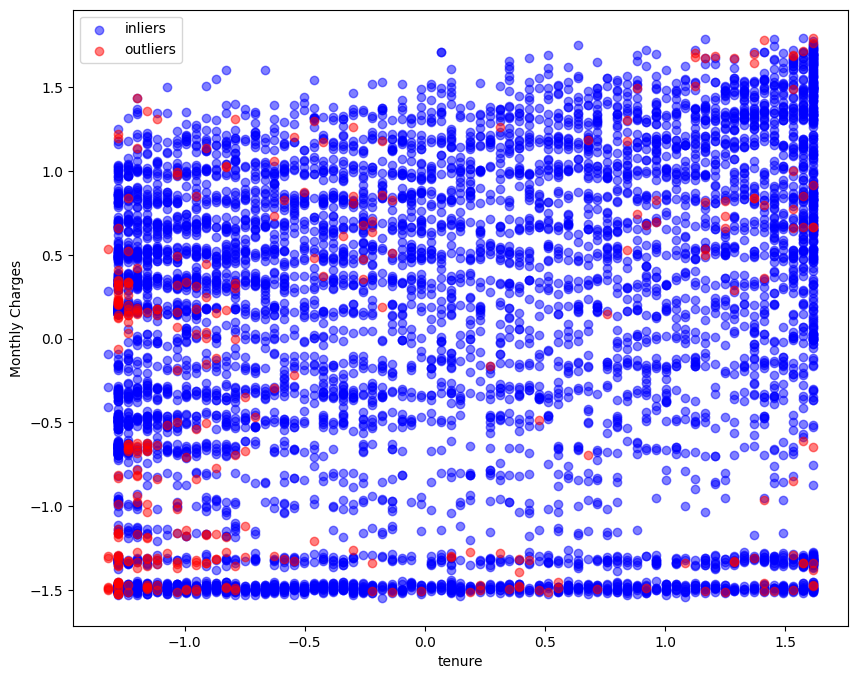

In [353]:
import matplotlib.pyplot as plt

# Get the x and y coordinates of the LOF outliers
x_outliers = df_selected['tenure'][df_selected['anomaly_lof'] == -1]
y_outliers = df_selected['MonthlyCharges'][df_selected['anomaly_lof'] == -1]

# Get the x and y coordinates of the inliers
x_inliers = df_selected['tenure'][df_selected['anomaly_lof'] == 1]
y_inliers = df_selected['MonthlyCharges'][df_selected['anomaly_lof'] == 1]

# Create a scatter plot of the inliers and outliers
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x_inliers, y_inliers, c='b', alpha=0.5, label='inliers')
ax.scatter(x_outliers, y_outliers, c='r', alpha=0.5, label='outliers')
ax.set_xlabel('tenure')
ax.set_ylabel('Monthly Charges')
ax.legend()
plt.show()